<a href="https://www.kaggle.com/code/vaishnavipatil165/loan-approval-prediction-project?scriptVersionId=298021811" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/injemam/loan-prediction-dataset/train_ctrUa4K.csv
/kaggle/input/datasets/injemam/loan-prediction-dataset/test_lAUu6dG.csv


# importing modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

# Loading the dataset

In [3]:
df=pd.read_csv('/kaggle/input/datasets/injemam/loan-prediction-dataset/train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.shape

(614, 13)

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
#showing columns in dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

**checking duplicate value**

In [13]:
df.duplicated().any()

np.False_

In [14]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [15]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.value_counts("Gender")

Gender
Male      502
Female    112
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

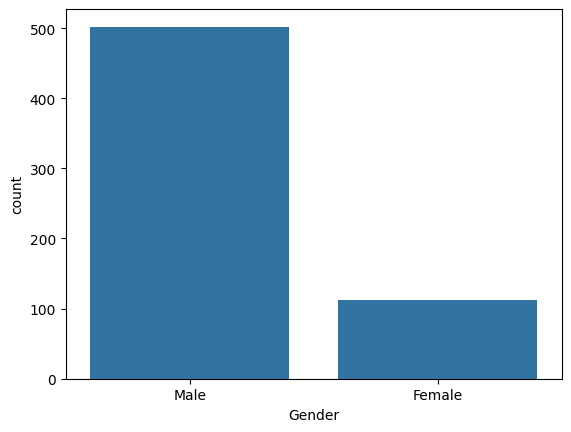

In [18]:
sns.countplot(x="Gender", data=df)

<Axes: xlabel='Married', ylabel='count'>

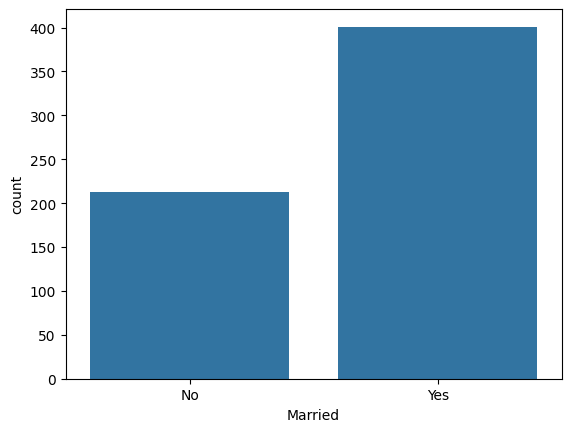

In [19]:
sns.countplot(x="Married", data=df)

<Axes: xlabel='Dependents', ylabel='count'>

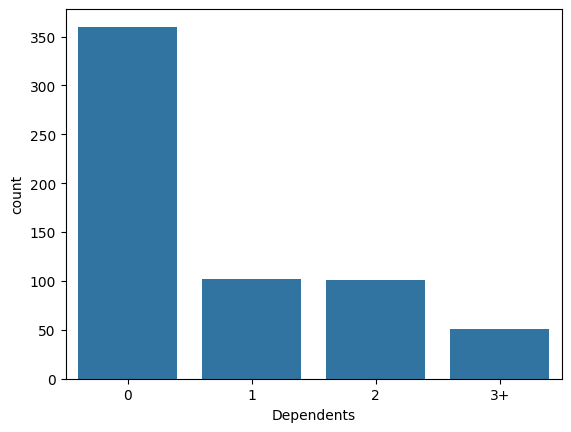

In [20]:
sns.countplot(x="Dependents", data=df)

<Axes: xlabel='Education', ylabel='count'>

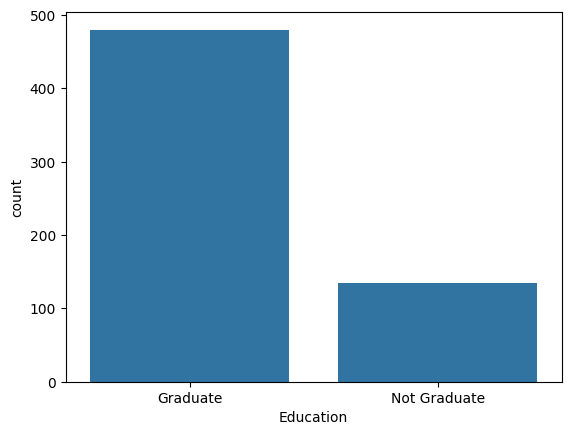

In [21]:
sns.countplot(x="Education", data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

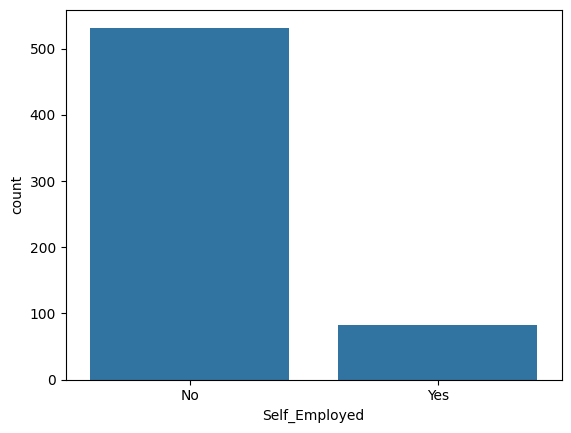

In [22]:
sns.countplot(x="Self_Employed", data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

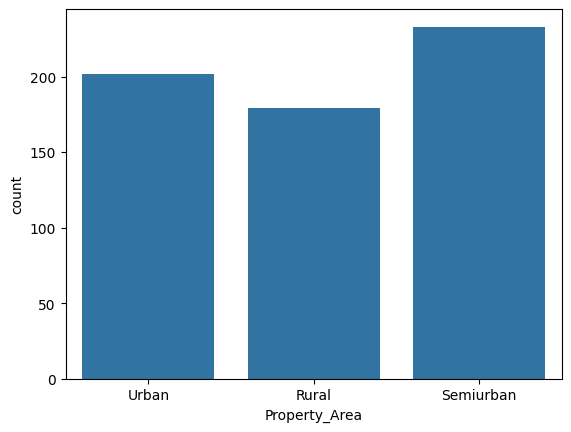

In [23]:
sns.countplot(x="Property_Area", data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

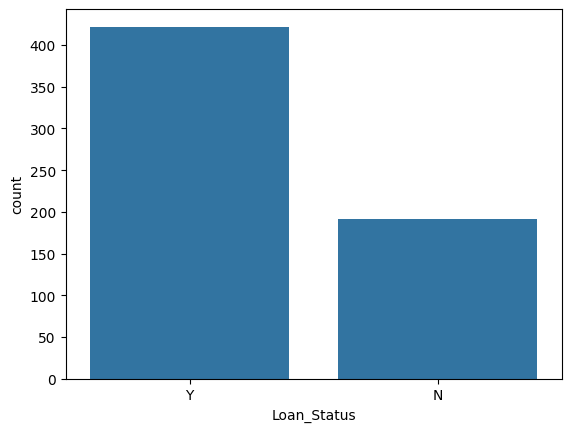

In [24]:
sns.countplot(x="Loan_Status", data=df)

In [25]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

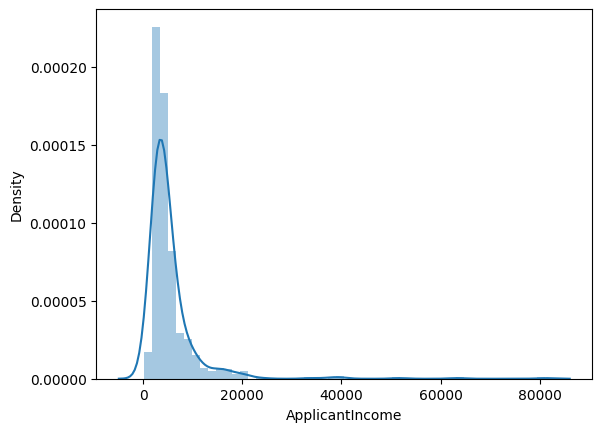

In [26]:
sns.distplot(df["ApplicantIncome"])

In [27]:
df["ApplicantIncomeLog"] = np.log(df["ApplicantIncome"])

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

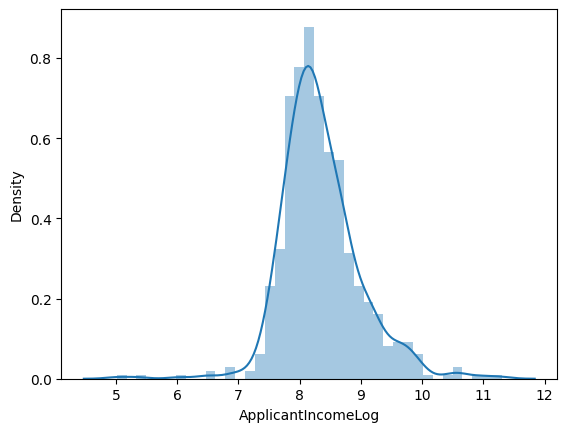

In [28]:
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

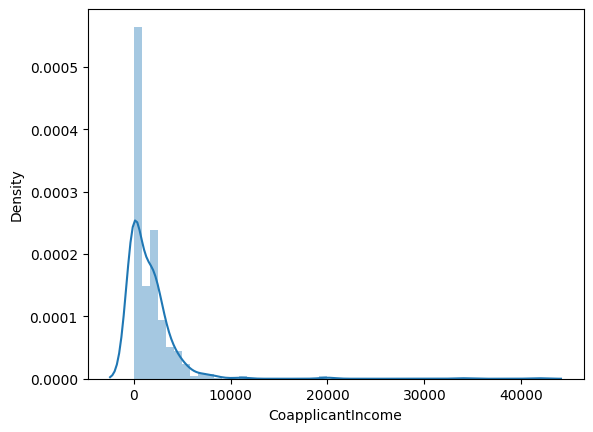

In [29]:
sns.distplot(df["CoapplicantIncome"])

In [30]:
df["CoapplicantIncomeLog"] = np.log(df["CoapplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

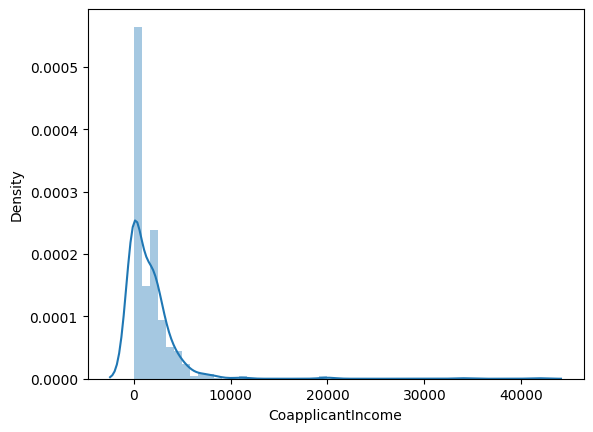

In [31]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

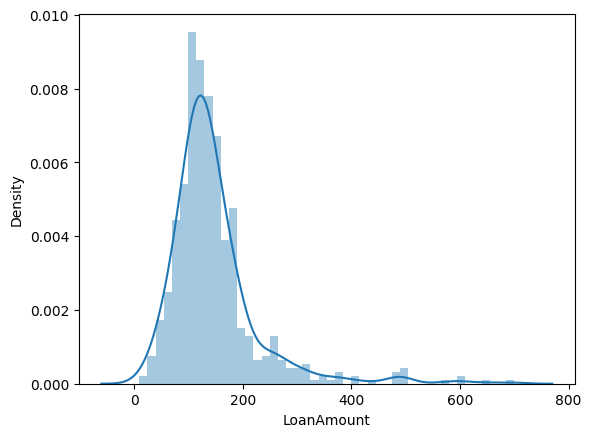

In [32]:
sns.distplot(df["LoanAmount"])

In [33]:
df["LoanAmountLog"] = np.log(df["LoanAmount"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

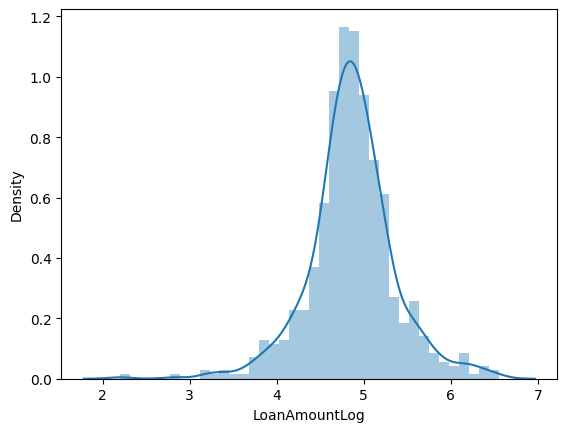

In [34]:
sns.distplot(df["LoanAmountLog"])

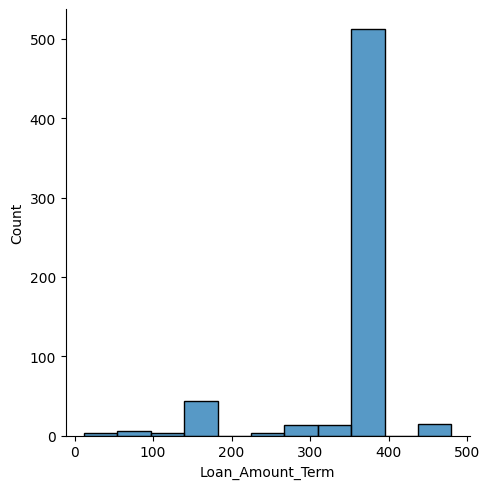

In [35]:
sns.displot(df["Loan_Amount_Term"])

In [36]:
df["Loan_Amount_TermLog"] = np.log(df["Loan_Amount_Term"])

<Axes: xlabel='Loan_Amount_TermLog', ylabel='Density'>

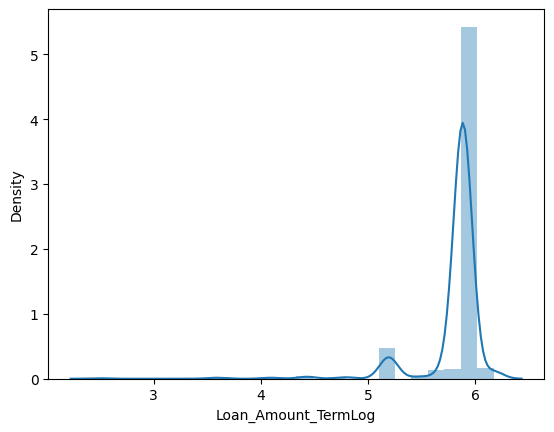

In [37]:
sns.distplot(df["Loan_Amount_TermLog"])

<Axes: xlabel='Credit_History', ylabel='Density'>

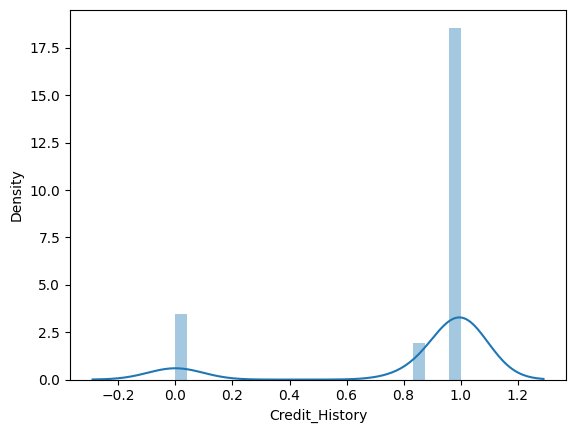

In [38]:
sns.distplot(df["Credit_History"])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

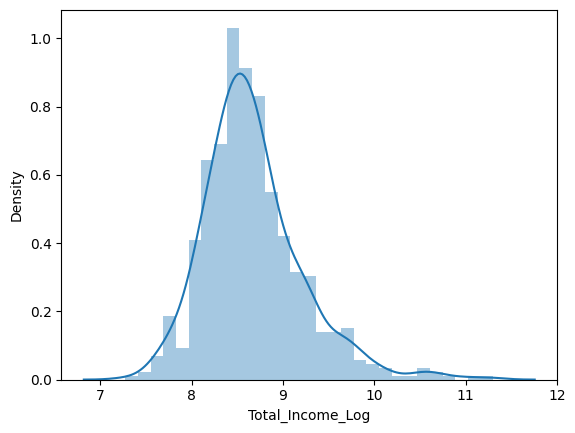

In [39]:
df["Total_Income_Log"] = np.log(df["Total_Income"])
sns.distplot(df["Total_Income_Log"])

In [40]:
df1 = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History",
         "Total_Income", "ApplicantIncomeLog", "CoapplicantIncomeLog", "Loan_Amount_TermLog",
          "LoanAmountLog", "Total_Income_Log"]]
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,Loan_Amount_TermLog,LoanAmountLog,Total_Income_Log
0,5849,0.0,146.412162,360.0,1.0,5849.0,8.674026,-inf,5.886104,4.986426,8.674026
1,4583,1508.0,128.000000,360.0,1.0,6091.0,8.430109,7.318540,5.886104,4.852030,8.714568
2,3000,0.0,66.000000,360.0,1.0,3000.0,8.006368,-inf,5.886104,4.189655,8.006368
3,2583,2358.0,120.000000,360.0,1.0,4941.0,7.856707,7.765569,5.886104,4.787492,8.505323
4,6000,0.0,141.000000,360.0,1.0,6000.0,8.699515,-inf,5.886104,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,2900.0,7.972466,-inf,5.886104,4.262680,7.972466
610,4106,0.0,40.000000,180.0,1.0,4106.0,8.320205,-inf,5.192957,3.688879,8.320205
611,8072,240.0,253.000000,360.0,1.0,8312.0,8.996157,5.480639,5.886104,5.533389,9.025456
612,7583,0.0,187.000000,360.0,1.0,7583.0,8.933664,-inf,5.886104,5.231109,8.933664


# heatmap

<Axes: >

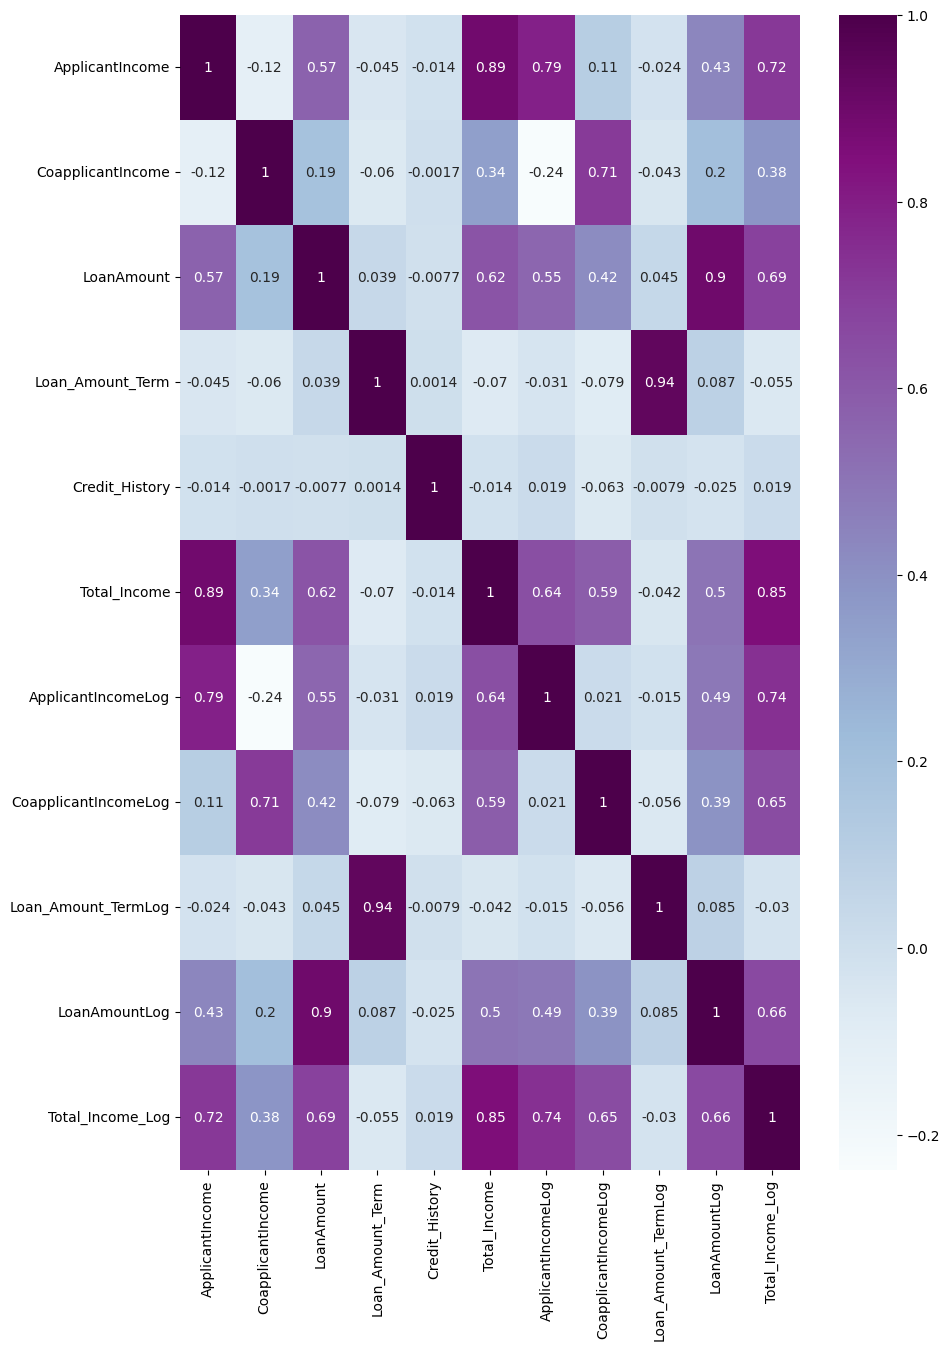

In [41]:
corr = df1.corr()
plt.figure(figsize=(10, 15))
sns.heatmap(corr, annot=True, cmap="BuPu")

In [42]:
cols = ["Loan_ID", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term",
        "Total_Income", "CoapplicantIncomeLog"]
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [43]:
cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train_Test_Split

In [44]:
x = df.drop(columns=["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [46]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income_Log
92,1,1,2,1,0,1.0,2,8.093462,4.394449,5.886104,8.535622
304,1,0,0,0,0,1.0,0,8.294050,4.941642,5.886104,8.779557
68,1,1,3,1,1,1.0,2,8.867850,4.828314,4.094345,8.867850
15,1,0,0,0,0,1.0,2,8.507143,4.828314,5.886104,8.507143
211,1,1,3,0,0,0.0,1,8.140316,4.852030,5.886104,8.451053
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1.0,1,7.536364,4.574711,5.886104,8.229511
106,1,1,2,0,0,1.0,2,9.342859,5.416100,5.886104,9.436918
270,0,0,0,0,0,1.0,2,8.082402,3.401197,5.886104,8.082402
435,0,1,0,0,0,1.0,1,9.215029,4.986426,5.480639,9.215029


In [47]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income_Log
350,1,1,0,0,0,1.000000,1,9.114160,5.429346,5.886104,9.114160
377,1,1,0,0,0,0.842199,1,8.368693,4.867534,5.886104,8.368693
163,1,1,2,0,0,1.000000,0,8.334952,5.062595,5.886104,8.633019
609,0,0,0,0,0,1.000000,0,7.972466,4.262680,5.886104,7.972466
132,1,0,0,0,0,1.000000,1,7.907652,4.248495,5.886104,7.907652
...,...,...,...,...,...,...,...,...,...,...,...
535,1,0,0,1,0,1.000000,0,7.843849,4.836282,5.886104,8.432071
468,0,1,2,1,0,1.000000,1,5.347108,4.584967,5.886104,8.047829
582,0,1,0,0,0,1.000000,1,8.060224,3.583519,5.886104,8.060224
291,1,1,2,0,0,0.000000,1,8.389360,4.844187,5.886104,8.389360


In [48]:
y_train

92     1
304    1
68     1
15     1
211    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 460, dtype: int64

In [49]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
535    1
468    1
582    1
291    0
75     0
Name: Loan_Status, Length: 154, dtype: int64

# Model Training

In [50]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is ", round(model.score(x_test, y_test)) * 100)
    #Cross Validation
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is ", round(np.mean(score)) * 100)

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred_lr = lr.predict(x_test)

In [54]:
model = LogisticRegression()
classify(model, x, y)

Accuracy is  100
Cross validation is  100


In [55]:
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is  100
Cross validation is  100


In [56]:
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is  100
Cross validation is  100


# Confusion Matrix

In [57]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]])

<Axes: >

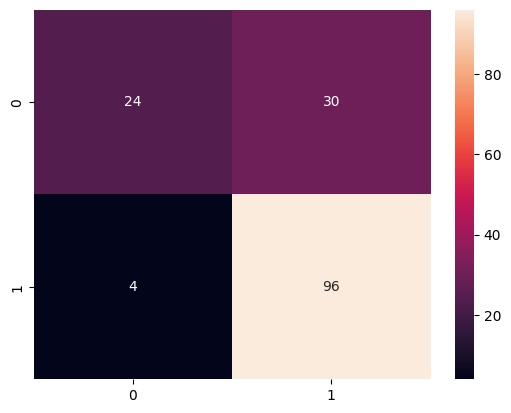

In [58]:
sns.heatmap(cm, annot=True)